## Vancouver Crime Data

### Introduction:
This dataset was obtained from the Vancouver Police Department. This dataset contains the records of crimes committed in various neighbourhoods of Vancouver. It contains factors such as the type of crime (theft, mischief, etc.), date, time and the location where the crime was committed. Using the techniques learnt in STAT 201, we will try to analyse a relationship between the volume of crime committed at 2 different neighbourhoods (these neighbourhoods differ in terms of population density and average income of the people living there). We will compare the average amount of crime committed in these 2 areas and also the proportion of violent crimes. This will help us determine whether or not we can establish a relationship between the amount of crime and population density and income level. Initially, our hypothesis is that higher density areas where the annual income of people is low will tend to be more dangerous (more crime) than areas with low population density and higher annual incomes. Moreover, these areas have a higher proportion of violent crimes. 


### Preliminary Results:

Loading Data into R

In [1]:
# installing required packages 

install.packages("skimr")
install.packages("GGally")
install.packages("tidyverse")
install.packages("repr")
install.packages("tidymodels")
install.packages("ggplot2")
install.packages("RCurl")


# installing libraries

library(tidyverse)
library(repr)
library(GGally)
library(tidymodels)
library(skimr)
library(ggplot2)
library(RCurl)

Installing package into 'C:/Users/Utsav Singh/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'skimr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Utsav Singh\AppData\Local\Temp\RtmpAZwbvy\downloaded_packages


Installing package into 'C:/Users/Utsav Singh/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Utsav Singh\AppData\Local\Temp\RtmpAZwbvy\downloaded_packages


Installing package into 'C:/Users/Utsav Singh/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Utsav Singh\AppData\Local\Temp\RtmpAZwbvy\downloaded_packages


Installing package into 'C:/Users/Utsav Singh/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'repr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Utsav Singh\AppData\Local\Temp\RtmpAZwbvy\downloaded_packages


Installing package into 'C:/Users/Utsav Singh/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'tidymodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Utsav Singh\AppData\Local\Temp\RtmpAZwbvy\downloaded_packages


Installing package into 'C:/Users/Utsav Singh/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Utsav Singh\AppData\Local\Temp\RtmpAZwbvy\downloaded_packages


Installing package into 'C:/Users/Utsav Singh/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'RCurl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'RCurl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Utsav Singh\Documents\R\win-library\4.1\00LOCK\RCurl\libs\x64\RCurl.dll to C:\Users\Utsav Singh\Documents\R\win-library\4.1\RCurl\libs\x64\RCurl.dll: Permission denied"
Warning message:
"restored 'RCurl'"



The downloaded binary packages are in
	C:\Users\Utsav Singh\AppData\Local\Temp\RtmpAZwbvy\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

-- Attaching packages -------------------------------------- tidymodels 0.1.4 --

v broom        0.7.12     v rsample      0.1.1 
v dials        0.1.0      v tune         0.1.6 
v infer        1.0.0      v workflows    0.2.4 
v modeldata    0.1.1      v workflowsets 0.1.0 
v parsnip      0.1.7      v yardstick    0.0.9 
v recipes      0.2.0      

-- Conflicts ----------------------------------------- tidymodels_co

In [2]:
# reading data from github

url <- "https://raw.githubusercontent.com/Utsav02/VancouverCrimeSTAT201/main/crimedata_csv_AllNeighbourhoods_AllYears.csv"

vancouver_crime <- read.csv(url)


Tidying data according to our use

In [3]:
# not selecting 2022 as it is the present year
vancouver_crime <- vancouver_crime %>%
filter(YEAR != 2022) %>%
select(TYPE, YEAR, NEIGHBOURHOOD)

# crimes that do not have any neighbourhoods mentioned
vancouver_crime[vancouver_crime == ""] <- "Neighbourhood Missing"

tidy_data <- vancouver_crime %>%
group_by(TYPE,NEIGHBOURHOOD) %>%
summarize(Count = n())%>%
pivot_wider(names_from = TYPE, 
values_from = Count)

tidy_data

westpoint_crime <- vancouver_crime %>%
filter(NEIGHBOURHOOD == "West Point Grey")

westend_crime <- vancouver_crime %>%
filter(NEIGHBOURHOOD == "West End")


`summarise()` has grouped output by 'TYPE'. You can override using the
`.groups` argument.


NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Homicide,Mischief,Offence Against a Person,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Arbutus Ridge,385,1981,3,1137,333,1501,2315,244,540,5,368
Central Business District,12411,4103,67,25002,20322,69745,66812,9168,4617,49,4040
Dunbar-Southlands,337,2211,1,1648,385,1233,3636,337,675,4,354
Fairview,4216,4150,4,4359,1844,13131,14832,4442,2237,15,1421
Grandview-Woodland,2741,5104,19,6415,5806,9451,9876,1888,3589,10,1483
Hastings-Sunrise,1144,3737,14,3910,2116,4734,8027,545,2789,19,1553
Kensington-Cedar Cottage,1575,4715,18,4920,3346,8109,9779,1225,3239,19,1895
Kerrisdale,438,2258,2,1302,354,1532,3491,255,618,9,568
Killarney,457,2351,12,2147,1194,1933,4942,274,1451,17,719


`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


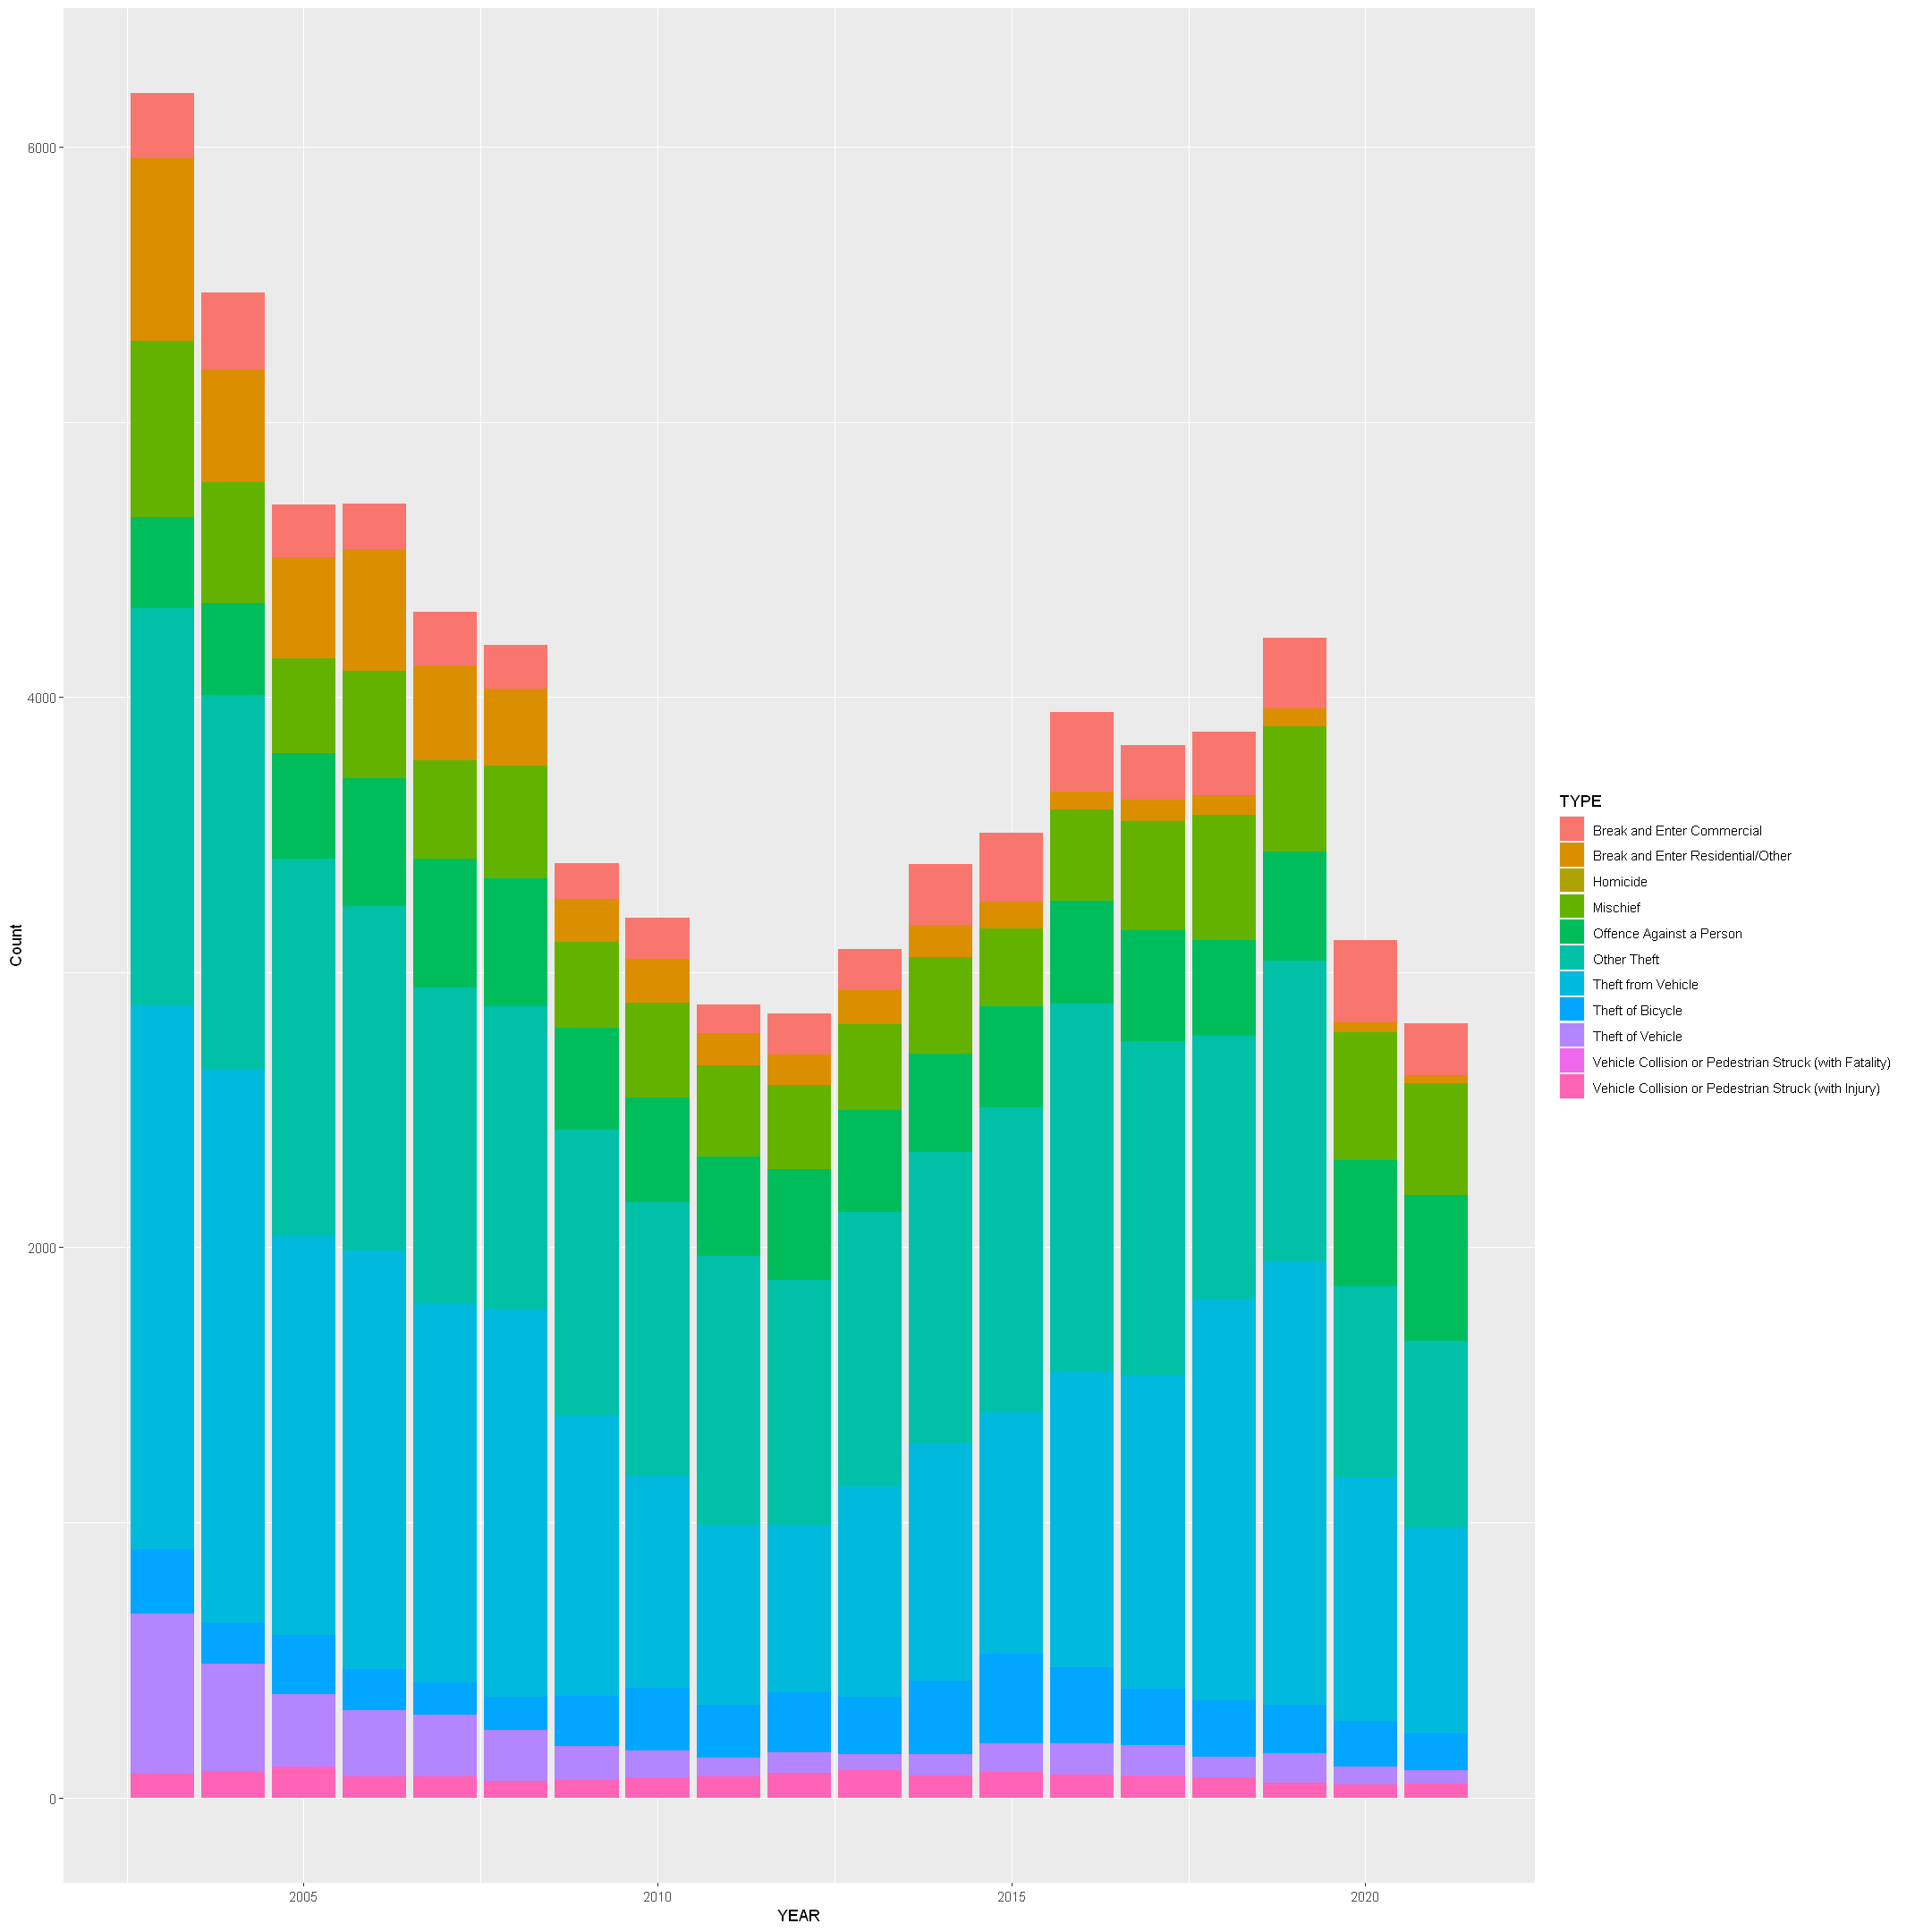

Warning message:
"package 'see' is in use and will not be installed"


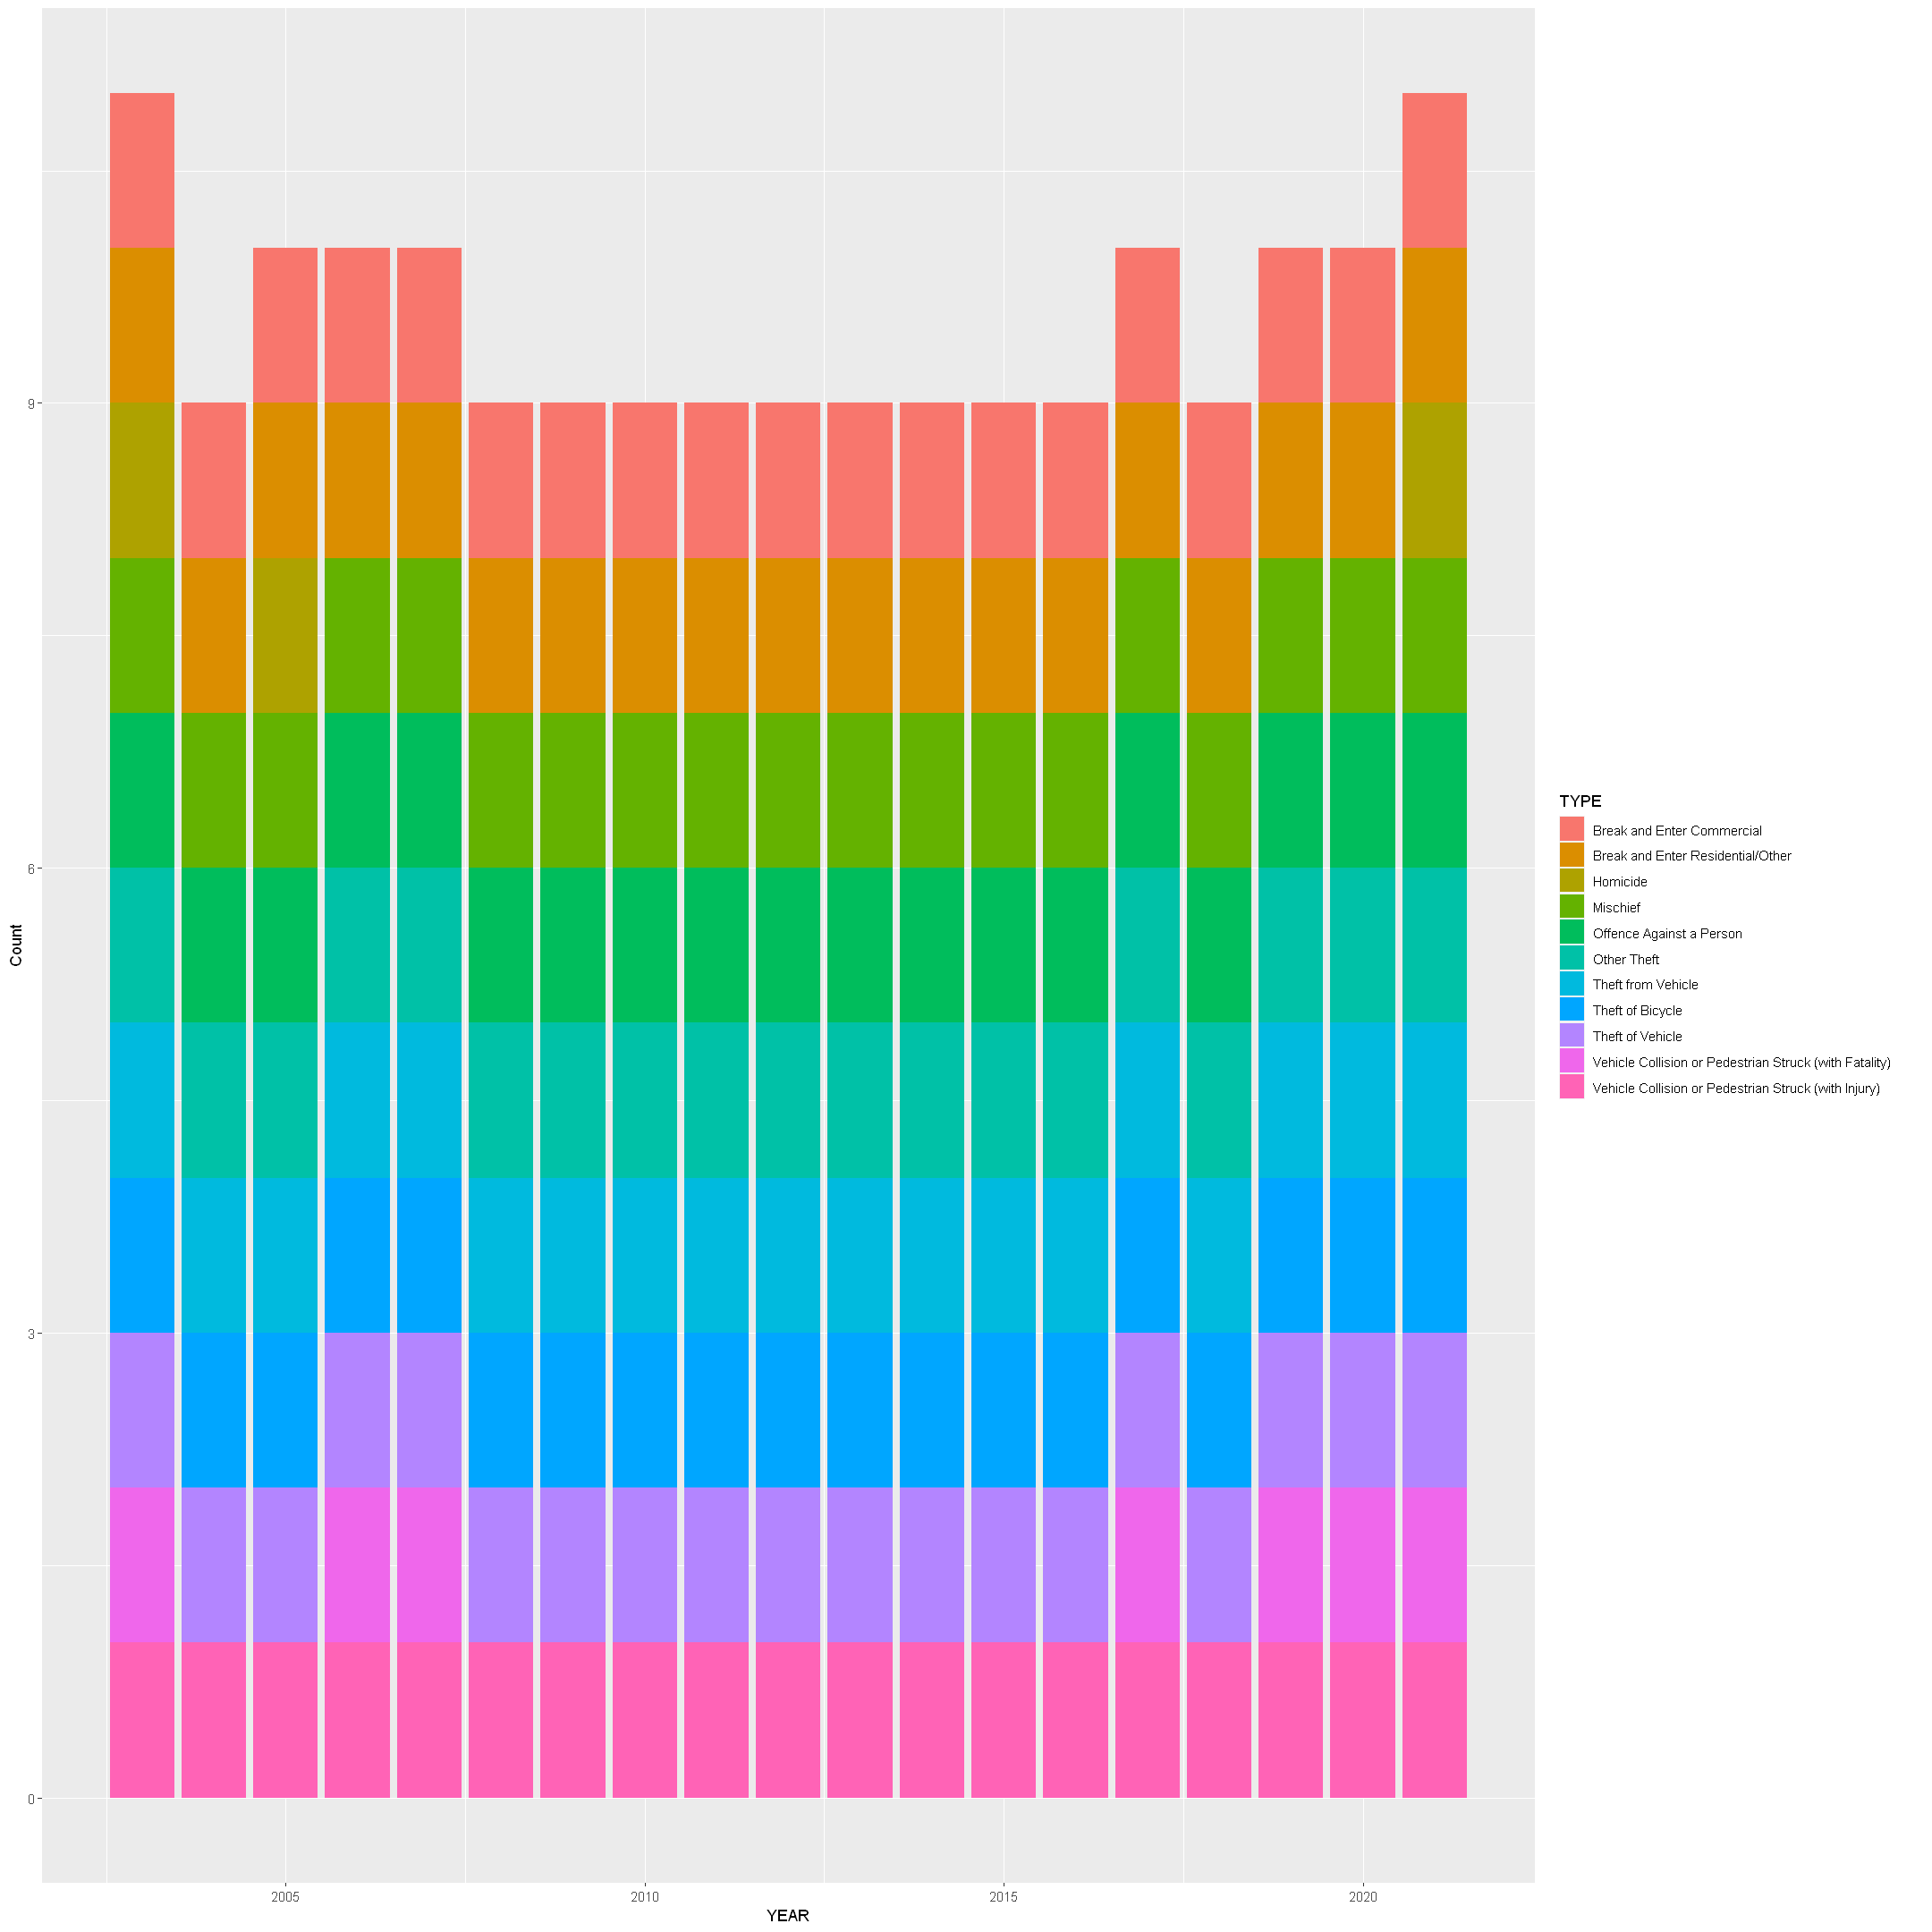

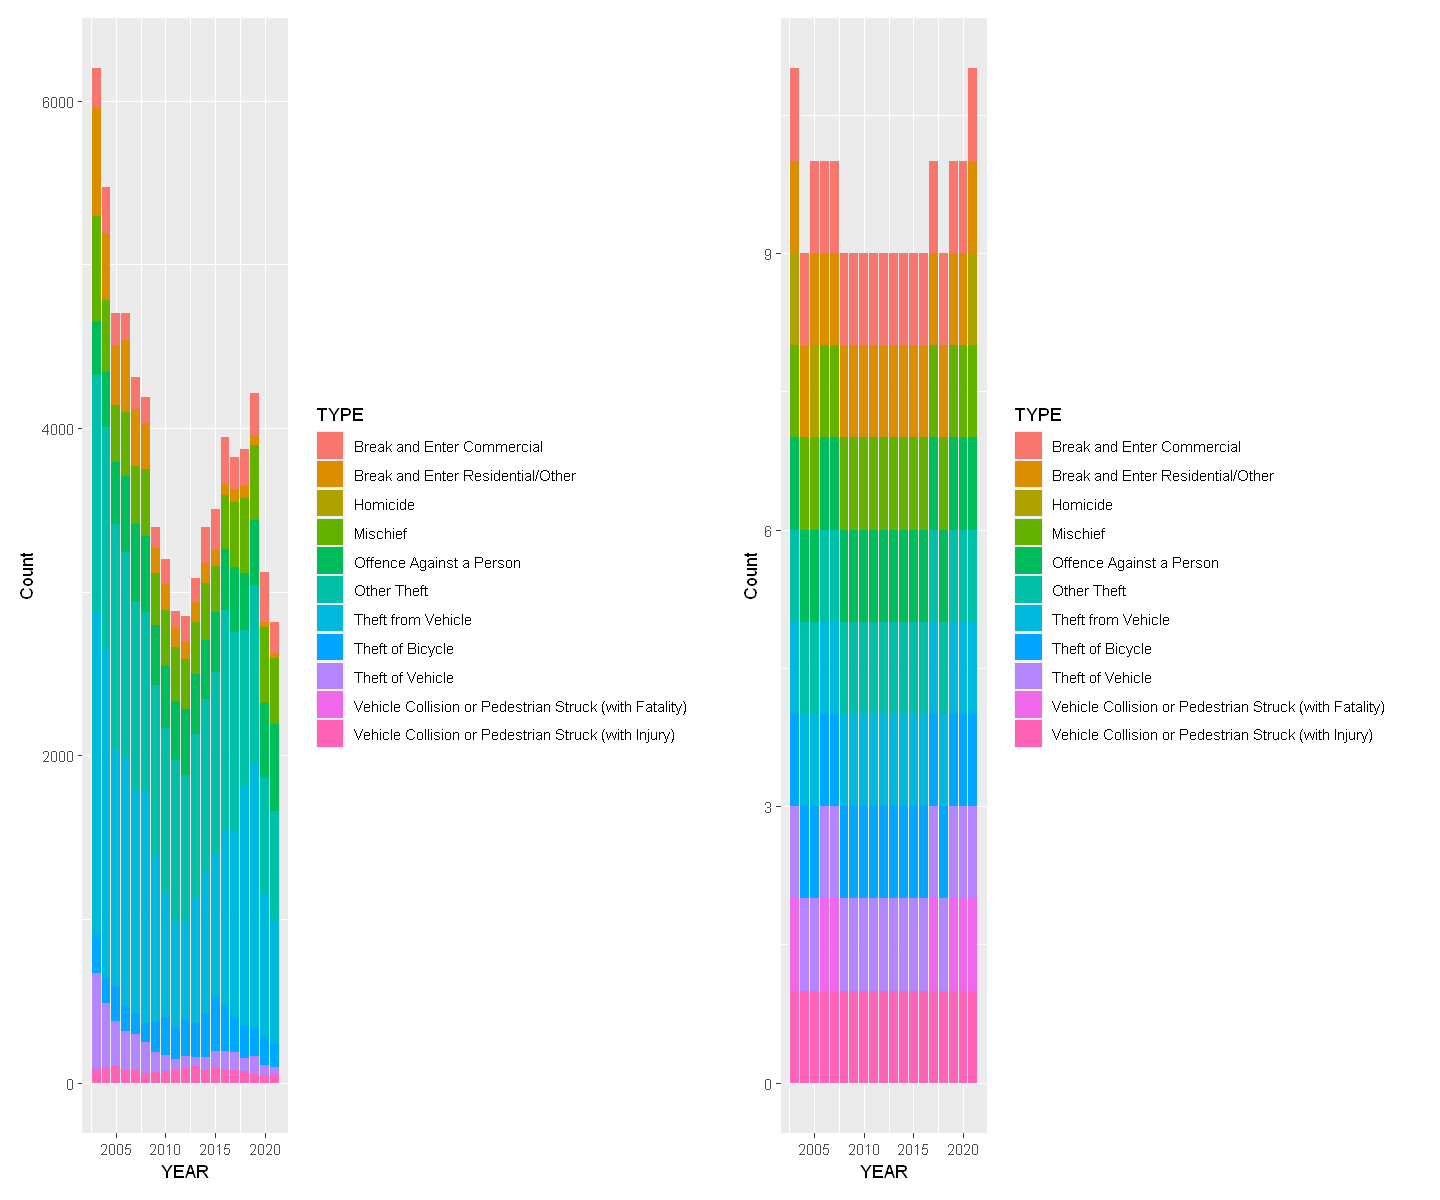

In [55]:
westpoint_plot <- westpoint_crime %>%
group_by(YEAR, TYPE) %>%
summarise(Count = n()) %>%
ggplot(aes(x = YEAR, y = Count, fill = TYPE)) +
geom_bar(stat = "identity")

westend_plot <- westend_crime %>%
group_by(YEAR, TYPE) %>%
summarise(Count = n()) %>%
ggplot(aes(x = YEAR, y = Count, fill = TYPE)) +
geom_bar(stat = "identity")
westend_plot
westpoint_plot
install.packages("see")

library(see)
plots(westend_plot,westpoint_plot)

List of all Neighbourhoods present in data and their total crimes reported in past 20 years

In [5]:
neighbourhood_grouped <- vancouver_crime %>%
group_by(NEIGHBOURHOOD) %>%
summarize(Count = n())

neighbourhood_grouped


NEIGHBOURHOOD,Count
<chr>,<int>
Arbutus Ridge,8812
Central Business District,216336
Dunbar-Southlands,10821
Fairview,50651
Grandview-Woodland,46382
Hastings-Sunrise,28588
Kensington-Cedar Cottage,38840
Kerrisdale,10827
Killarney,15497


List of all Crimes and their count in the past 20 years

In [6]:
crime_grouped <- vancouver_crime %>%
group_by(TYPE) %>%
summarize(Count = n()) %>%
mutate(proportion = (Count / sum(Count)) * 100)

crime_grouped


TYPE,Count,proportion
<chr>,<int>,<dbl>
Break and Enter Commercial,44307,5.43846363
Break and Enter Residential/Other,70231,8.62050554
Homicide,292,0.03584155
Mischief,96283,11.81825881
Offence Against a Person,69840,8.57251223
Other Theft,198285,24.33849640
Theft from Vehicle,229617,28.18434338
Theft of Bicycle,34778,4.26882632
Theft of Vehicle,43371,5.32357429


Violent Crimes


TYPE,Count
<chr>,<int>
Homicide,3
Offence Against a Person,438
Vehicle Collision or Pedestrian Struck (with Fatality),8


TYPE,Count
<chr>,<int>
Homicide,11
Offence Against a Person,7570
Vehicle Collision or Pedestrian Struck (with Fatality),9


`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


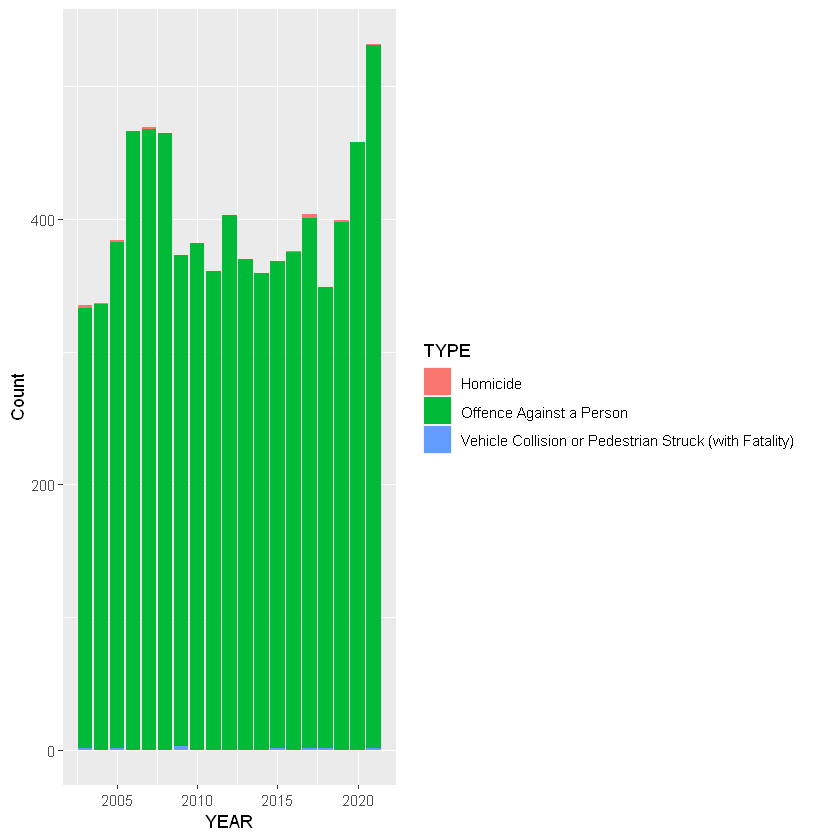

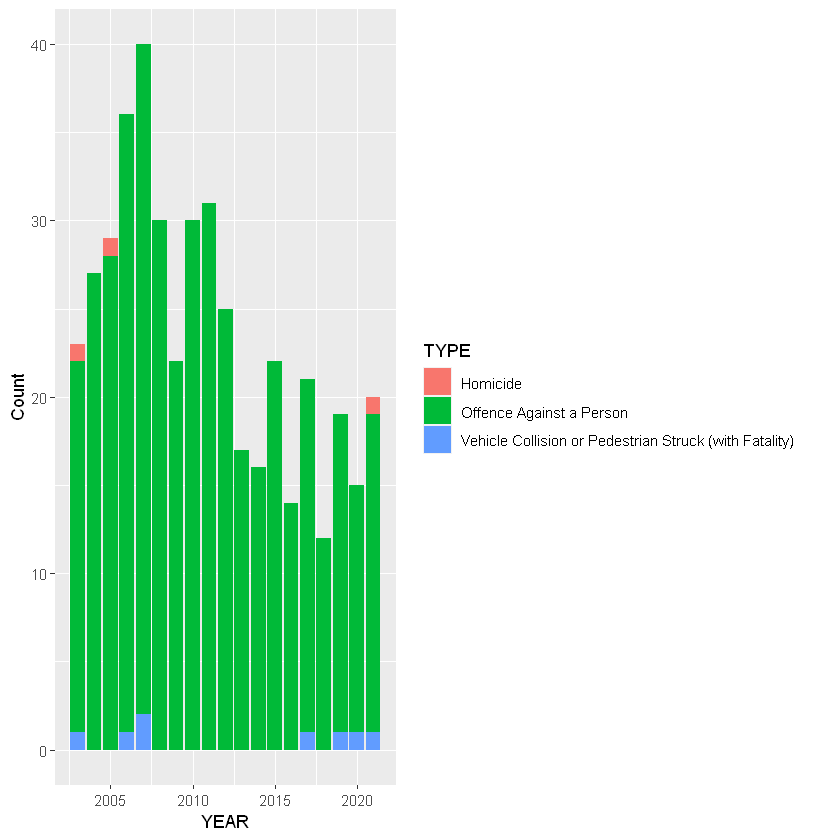

In [7]:
violent_crimes <- vancouver_crime %>%
filter(TYPE == "Homicide" | TYPE == "Offence Against a Person" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)")


westend_violent <- violent_crimes %>%
filter(NEIGHBOURHOOD == "West End")

westpoint_violent <- violent_crimes %>%
filter(NEIGHBOURHOOD == "West Point Grey")

westpoint_violent%>%
group_by(TYPE)%>%
summarise(Count = n())


westend_violent%>%
group_by(TYPE)%>%
summarise(Count = n())

westend_violent %>%
group_by(YEAR, TYPE) %>%
summarise(Count = n()) %>%
ggplot(aes(x = YEAR, y = Count, fill = TYPE)) +
geom_bar(stat = "identity")


westpoint_violent %>%
group_by(YEAR, TYPE) %>%
summarise(Count = n()) %>%
ggplot(aes(x = YEAR, y = Count, fill = TYPE)) +
geom_bar(stat = "identity")


True Point Estimates

1. Mean of Westend crime per year
2. Mean of WestPoint crime epr year
3. Proportion of violent crimes happening in both neighbourhoods ()

Sampling

1.

`summarise()` has grouped output by 'NEIGHBOURHOOD'. You can override using the
`.groups` argument.
Setting `type = "bootstrap"` in `generate()`.

Setting `type = "bootstrap"` in `generate()`.



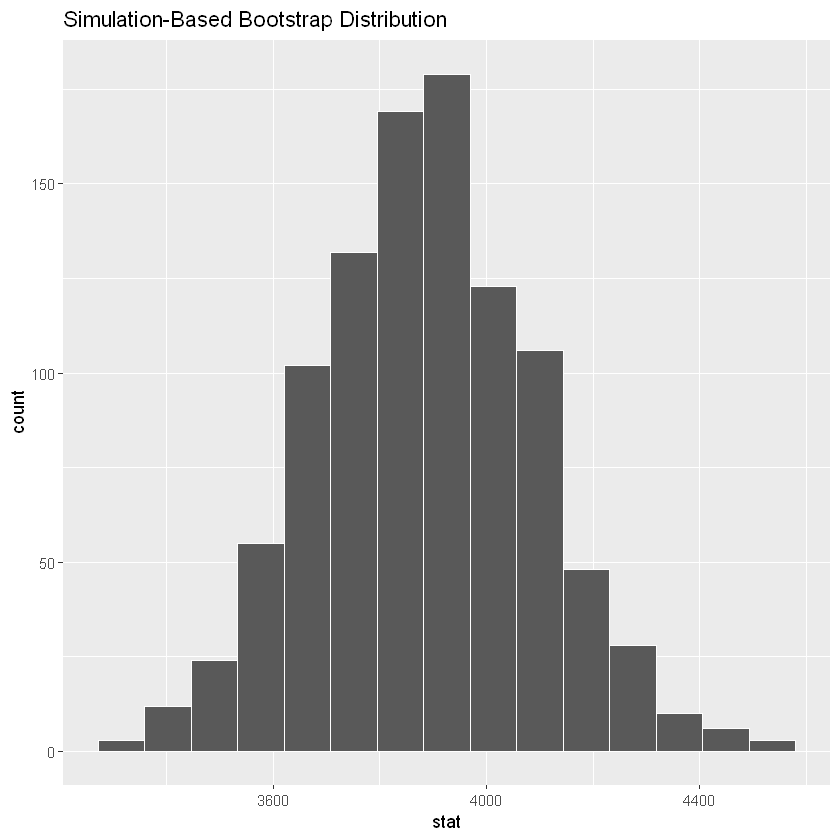

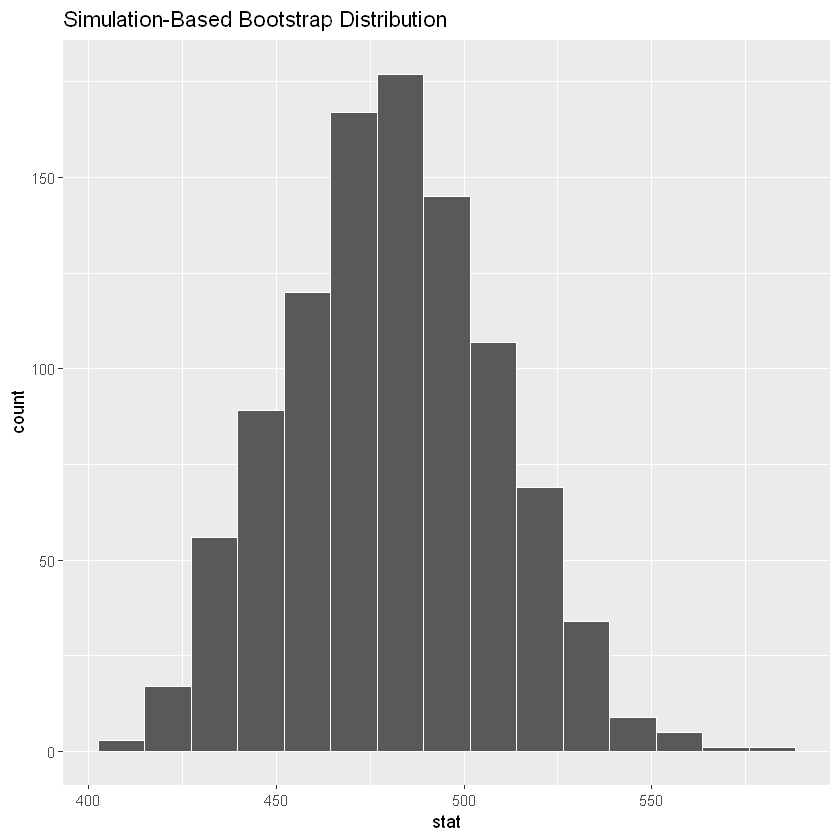

In [8]:
neighbourhood_year_grouped <- vancouver_crime %>%
group_by(NEIGHBOURHOOD, YEAR) %>%
summarize(Count = n()) 

westend_crime_sample <- neighbourhood_year_grouped %>%
filter(NEIGHBOURHOOD == "West End") %>%
specify(response = Count) %>%
generate(reps = 1000) %>%
calculate(stat = "mean") 

visualise(westend_crime_sample)

westpoint_crime_sample <- neighbourhood_year_grouped %>%
filter(NEIGHBOURHOOD == "West Point Grey") %>%
specify(response = Count) %>%
generate(reps = 1000) %>%
calculate(stat = "mean") 

visualise(westpoint_crime_sample)


YEAR,TYPE,Count,ViolentCrime
<int>,<chr>,<int>,<chr>
2003,Break and Enter Commercial,29,NO
2003,Break and Enter Residential/Other,144,NO
2003,Homicide,1,YES
2003,Mischief,79,NO
2003,Offence Against a Person,21,YES
2003,Other Theft,112,NO


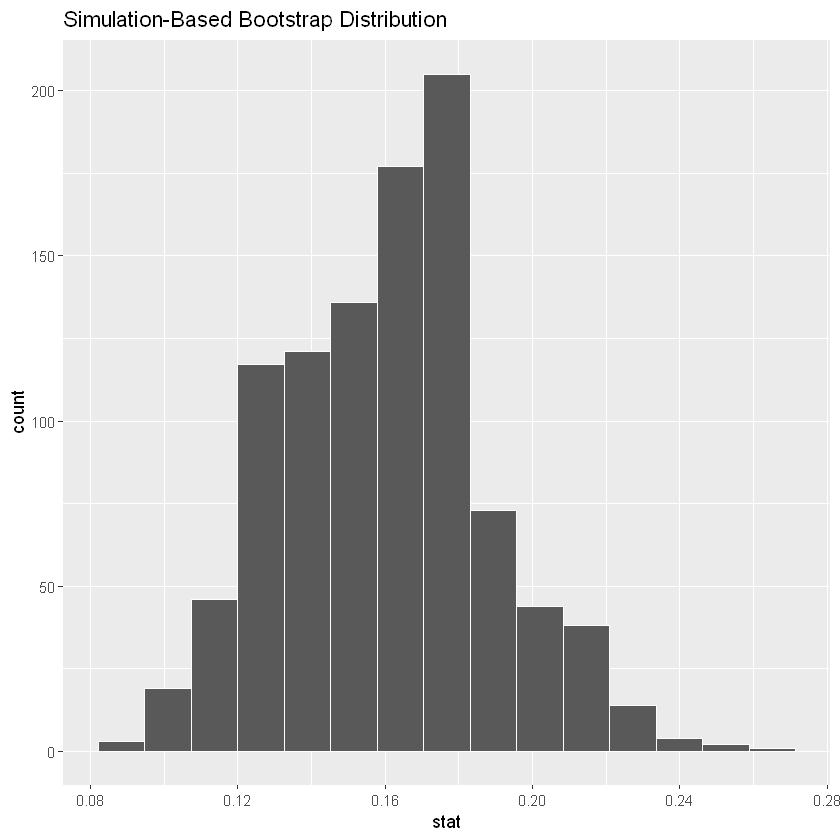

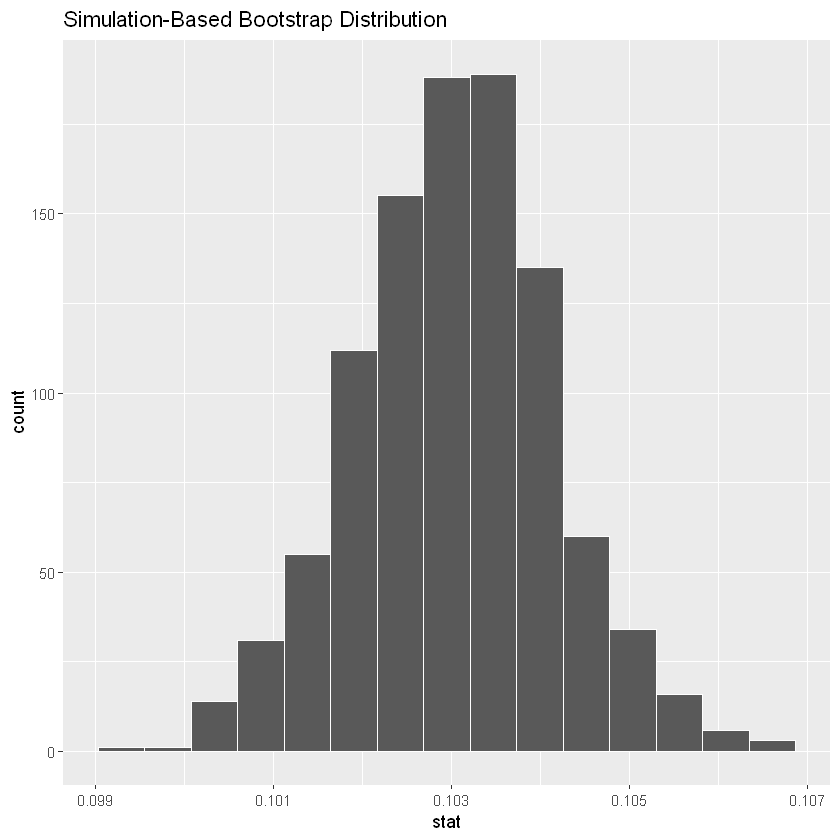

In [29]:
westpoint_crime <- westpoint_crime %>%
mutate(ViolentCrime = if_else(TYPE == "Homicide" | TYPE == "Offence Against a Person" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)", "YES", "NO"))

head(westpoint_crime)

westend_crime <- westend_crime %>%
mutate(ViolentCrime = if_else(TYPE == "Homicide" | TYPE == "Offence Against a Person" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)", "YES", "NO"))

westpoint_violent_sample <-  westpoint_crime %>%
specify(response = ViolentCrime, success = "YES") %>%
generate(type = "bootstrap", reps = 1000) %>% 
calculate(stat = "prop") 

visualise(westpoint_violent_sample)

westend_violent_sample <-  westend_crime %>%
specify(response = ViolentCrime, success = "YES") %>%
generate(type = "bootstrap", reps = 1000) %>% 
calculate(stat = "prop")

visualise(westend_violent_sample)


Neighbourhood and Year grouped

In [24]:
neighbourhood_year_grouped <- vancouver_crime %>%
group_by(NEIGHBOURHOOD, YEAR) %>%
summarize(Count = n())

head(neighbourhood_year_grouped)


`summarise()` has grouped output by 'NEIGHBOURHOOD'. You can override using the
`.groups` argument.


NEIGHBOURHOOD,YEAR,Count
<chr>,<int>,<int>
Arbutus Ridge,2003,746
Arbutus Ridge,2004,755
Arbutus Ridge,2005,705
Arbutus Ridge,2006,543
Arbutus Ridge,2007,453
Arbutus Ridge,2008,425


Finally, after analyzing all variables and values, to answer our question we select neighbourhoods and their respect annual crime count 

In [25]:
crime_data_tidy <- pivot_wider(neighbourhood_year_grouped,
  names_from = NEIGHBOURHOOD,
  values_from = Count
)
crime_data_tidy

type_year_grouped <- vancouver_crime %>%
group_by(YEAR,TYPE) %>%
summarise(Count = n())

crime_data_tidy_2 <- pivot_wider(type_year_grouped,
  names_from = TYPE,
  values_from = Count
)
crime_data_tidy_2


my_skim <- skim_with(numeric = sfl(median, mean,  sd, min, max),
                                   append = FALSE)

# Creating summary table
summary_df <- my_skim(crime_data_tidy) %>% 
    tibble::as_tibble() %>% 
    select(skim_variable:numeric.max)

summary_df <- summary_df[-1,]
summary_df

YEAR,Arbutus Ridge,Central Business District,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Stanley Park,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2003,746,13053,858,4392,4049,2226,2751,746,1101,...,2823,1356,604,665,516,3533,2254,1315,6196,672
2004,755,12178,1047,3881,3566,2286,3140,954,1341,...,3221,1398,618,573,478,3423,2170,1469,5470,783
2005,705,11262,804,3939,3206,1867,2708,944,1283,...,2827,1358,636,546,446,3332,2003,1359,4700,734
2006,543,11754,624,3289,2841,1855,2625,747,1148,...,2871,1239,401,443,415,2788,1969,1117,4704,573
2007,453,11473,513,3025,2857,1566,2193,560,989,...,2256,939,415,368,288,2525,1759,905,4309,465
2008,425,11441,425,2642,2414,1457,2063,435,728,...,2184,948,345,342,335,2493,1471,810,4191,390
2009,457,10048,453,2629,2083,1385,1889,508,798,...,1999,869,272,397,316,2180,1336,796,3395,441
2010,393,9101,467,2237,2008,1251,1887,444,729,...,2086,844,314,366,237,2133,1380,755,3197,429
2011,354,9071,555,1975,1944,1313,1665,480,657,...,1897,858,408,333,231,2146,1101,810,2884,397


`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


YEAR,Break and Enter Commercial,Break and Enter Residential/Other,Homicide,Mischief,Offence Against a Person,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2003,3197,6884,18,6389,3507,11428,17744,1418,6361,25,1856
2004,3282,6535,22,5598,3788,11441,18203,1230,6100,22,1892
2005,2640,5540,22,5063,3764,11359,16555,1416,5030,33,2003
2006,2845,5672,18,5180,4349,10302,14730,1467,3681,20,1388
2007,2435,4997,19,4814,4410,9725,12226,1203,3304,24,1239
2008,2225,4432,18,5274,4218,9468,11295,1176,2420,17,1186
2009,1859,3497,18,4428,3900,9472,10008,1641,1880,14,1278
2010,1659,3266,10,4514,3768,9367,8614,1669,1466,10,1327
2011,1752,3230,15,4842,3888,9389,7435,1517,1094,12,1261


skim_variable,n_missing,complete_rate,numeric.median,numeric.mean,numeric.sd,numeric.min,numeric.max
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
Arbutus Ridge,0,1,430,463.789474,134.101363,285,755
Central Business District,0,1,11265,11386.105263,1985.229875,8846,16063
Dunbar-Southlands,0,1,519,569.526316,170.195759,329,1047
Fairview,0,1,2468,2665.842105,734.762037,1589,4392
Grandview-Woodland,0,1,2230,2441.157895,615.252095,1585,4049
Hastings-Sunrise,0,1,1400,1504.631579,333.390197,1140,2286
Kensington-Cedar Cottage,0,1,1910,2044.210526,450.930591,1460,3140
Kerrisdale,0,1,508,569.842105,162.268044,420,954
Killarney,0,1,728,815.631579,237.967134,522,1341


Visualizing Data 

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


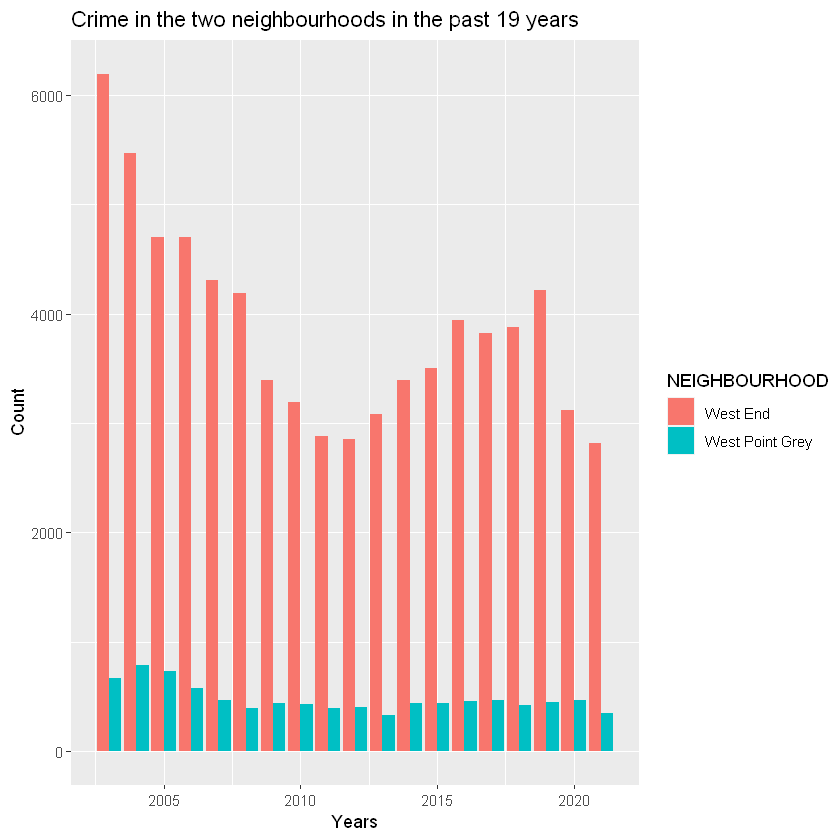

In [30]:
compare_crime <- vancouver_crime %>%
filter(NEIGHBOURHOOD == "West End" | NEIGHBOURHOOD == "West Point Grey") %>%
group_by(YEAR, NEIGHBOURHOOD) %>%
summarise(Count = n())



plot_1 <- compare_crime %>%
ggplot(aes(x = YEAR, y = Count, fill = NEIGHBOURHOOD)) +
geom_bar(stat = "identity", position = "dodge") +
labs(x = "Years", title = "Crime in the two neighbourhoods in the past 19 years")

plot_1

Null Hypothesis 

NEIGHBOURHOOD,YEAR,Count
<chr>,<int>,<int>
West End,2003,6196
West End,2004,5470
West End,2005,4700
West End,2006,4704
West End,2007,4309
West End,2008,4191
West End,2009,3395
West End,2010,3197
West End,2011,2884


Setting `type = "bootstrap"` in `generate()`.



stat
<dbl>
3877.474


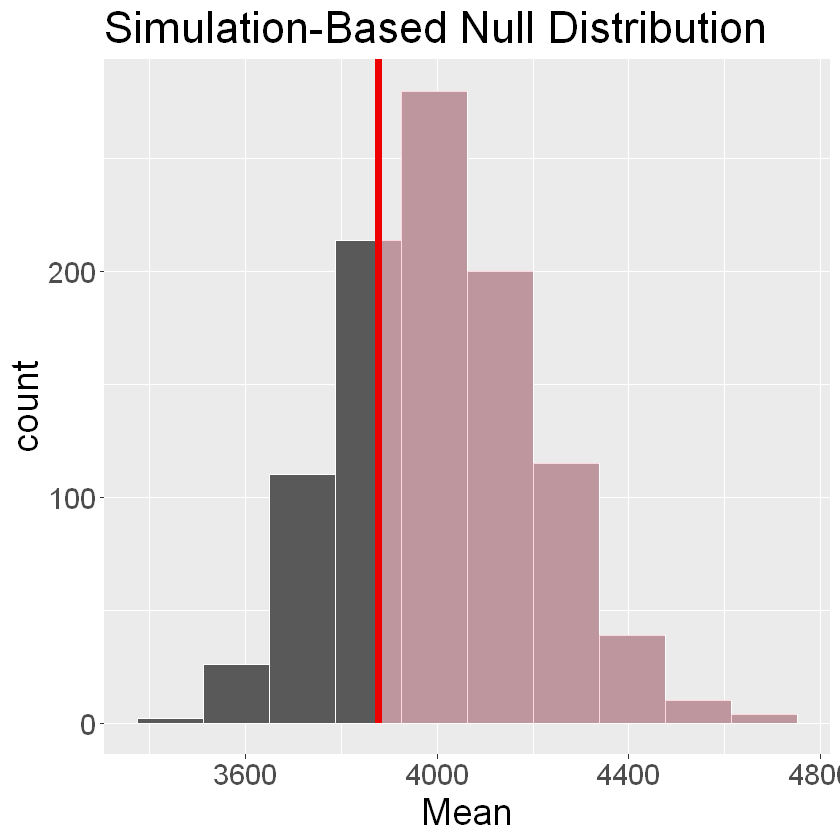

In [27]:
test2 <- neighbourhood_year_grouped %>%
filter(NEIGHBOURHOOD == "West End")
test2

workflow <- test2 %>%
specify(response = Count) %>%
hypothesize(null = "point", mu =4000) %>%
generate(reps = 1000) %>%
calculate(stat = "mean") 


observed_mean <- neighbourhood_year_grouped %>%
filter(NEIGHBOURHOOD == "West End") %>%
    specify(response = Count)  %>%
    calculate(stat = "mean")

observed_mean

max_flow_result_plot <- 
    workflow %>% 
    visualize(bins = 10) + 
    shade_p_value(obs_stat = observed_mean, direction = "right")+
    theme(text = element_text(size = 22)) +
    xlab("Mean")

max_flow_result_plot


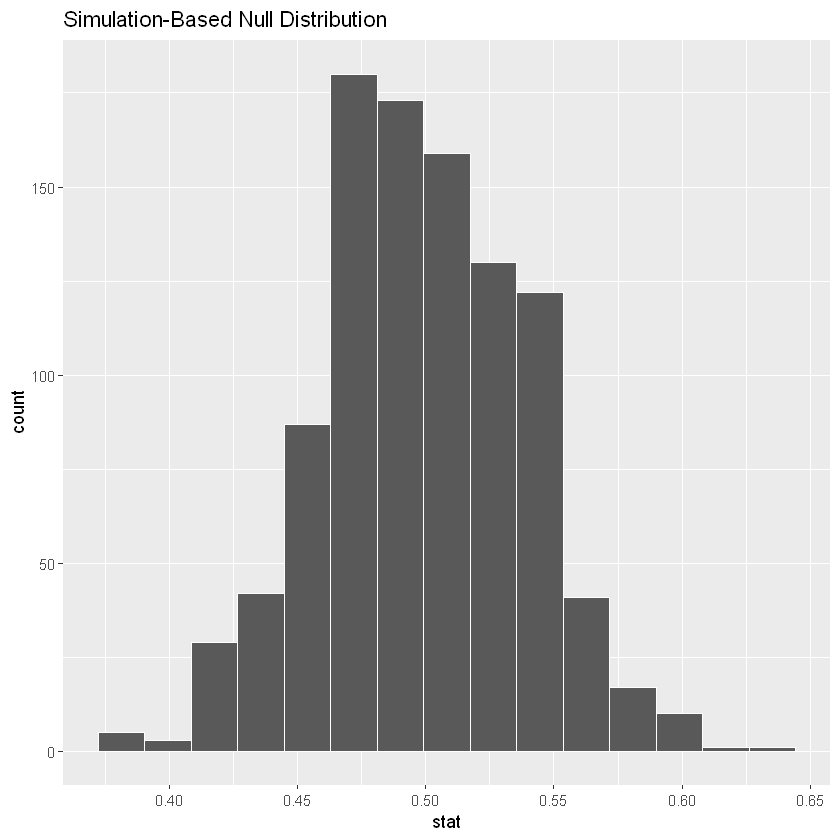

In [37]:

workflow2 <-  westpoint_crime %>%
specify(response = ViolentCrime, success = "YES") %>%
hypothesize(null = "point", p = 0.5)%>%
generate(type = "draw", reps = 1000) %>% 
calculate(stat = "prop") 

visualise(workflow2)

## Methods:
As mentioned, the goal of this project is to determine if population density and income level have an influence on the crime rate in areas of Vancouver, specifically West End and West Point Grey. A random sample, representative of the neighbourhoods, has been taken from each of the two filtered datasets. These samples were then subject to bootstrapping and asymptotics to retrieve the sample proportion and the sample mean of each neighbourhood. After the repeated sampling performed in the previous section, it is expected that 90% of the resulting confidence intervals have captured the true population parameters for both neighbourhoods. While the statistics provided can help estimate the true population parameter, further testing—such as hypothesis testing—may be done to determine whether the data from the samples are statistically significant. Moreover, other sampling techniques may be experimented with to discover the possibility of having a more representative sample.

The hypothesis test that will be done in this project will utilise a 90% confidence level and the hypothesis that higher density areas where the annual income of people is low will tend to be more dangerous (more crime) than areas with low population density and higher annual incomes. The test statistics for this will be sample means and sample proportions. More specifically, the mean quantity of violent crimes and the proportion of violent crimes to the cumulative quantity of crimes in the neighbourhoods. 

With this report, hopefully, individuals will be able to gain a sense of the safety levels in different areas in Vancouver, especially those who are new to the city. Moreover, individuals who plan to stay in Vancouver for a long period of time may take these results as a factor into their consideration when deciding on which area of Vancouver to reside or work in. Furthermore, future questions that may arise from this project may include, although not limited to, the following:
How did the 2019 novel coronavirus affect the relationship among the population density, income level, and crime rate in Vancouver?
Which factor, whether population density or income level, has a stronger influence on the crime rate in Vancouver?
